### Import

In [1]:
# 필요한 모듈 불러오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import dataframe_image as dfi
import numpy as np
import seaborn as sns
import pickle

In [2]:
sns.set_palette("pastel")

In [3]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

# 1) 어느 구가 30-40대 인구가 제일 많은지 TOP 5
* 연령대별 비율
* 총 인구수

In [4]:
# 데이터 불러오기
df_age = pd.read_csv('./csv/seoul_population.csv', index_col=0)

In [5]:
# 필요없는 컬럼 제거
df_age.drop(columns=['male', 'female'], axis=1, inplace=True)

In [6]:
# 자치구 리스트
gu_arr = df_age['gu'].unique()
gu_lis = gu_arr.tolist()

In [7]:
# 데이터 확인
df_age.head(6)

,gu,age_group,population
0,종로구,20대 미만,18355
1,종로구,20대,28087
2,종로구,30대,10782
3,종로구,40대,9502
4,종로구,50대,9816
5,종로구,60대 이상,72294


In [8]:
# 구별 연령대 비율 구하기
ratio_lis = []
for gu in gu_lis:
    df_t = df_age[df_age['gu'] == gu]
    total_pop = df_t['population'].sum()
    ratio_lis.extend([
        round((df_age.iloc[0, 2]/total_pop)*100, 2), round((df_age.iloc[1, 2]/total_pop)*100, 2), round((df_age.iloc[2, 2]/total_pop)*100, 2), 
        round((df_age.iloc[3, 2]/total_pop)*100, 2), round((df_age.iloc[4, 2]/total_pop)*100, 2), round((df_age.iloc[5, 2]/total_pop)*100, 2)
        ])
print(ratio_lis, len(ratio_lis))

[12.33, 18.87, 7.24, 6.38, 6.6, 48.57, 14.53, 22.24, 8.54, 7.52, 7.77, 57.24, 8.28, 12.67, 4.86, 4.29, 4.43, 32.61, 6.41, 9.81, 3.76, 3.32, 3.43, 25.24, 5.29, 8.09, 3.11, 2.74, 2.83, 20.83, 5.27, 8.07, 3.1, 2.73, 2.82, 20.76, 4.83, 7.39, 2.84, 2.5, 2.58, 19.01, 4.21, 6.45, 2.48, 2.18, 2.25, 16.6, 6.27, 9.6, 3.69, 3.25, 3.36, 24.71, 5.94, 9.09, 3.49, 3.07, 3.18, 23.38, 3.64, 5.57, 2.14, 1.89, 1.95, 14.35, 4.01, 6.14, 2.36, 2.08, 2.15, 15.81, 5.84, 8.93, 3.43, 3.02, 3.12, 22.99, 5.03, 7.69, 2.95, 2.6, 2.69, 19.8, 4.24, 6.48, 2.49, 2.19, 2.27, 16.68, 3.28, 5.02, 1.93, 1.7, 1.75, 12.91, 4.31, 6.59, 2.53, 2.23, 2.3, 16.96, 7.42, 11.35, 4.36, 3.84, 3.97, 29.23, 4.56, 6.97, 2.68, 2.36, 2.44, 17.94, 4.73, 7.24, 2.78, 2.45, 2.53, 18.63, 3.7, 5.67, 2.17, 1.92, 1.98, 14.58, 4.68, 7.16, 2.75, 2.42, 2.5, 18.43, 3.65, 5.58, 2.14, 1.89, 1.95, 14.37, 2.89, 4.43, 1.7, 1.5, 1.55, 11.39, 4.07, 6.23, 2.39, 2.11, 2.18, 16.03] 150


In [9]:
# 반복문에서 구한 연령대 비율을 데이터 프레임에 추가
age_ratio = pd.Series(ratio_lis)
df_age.insert(loc=3, column='age_ratio', value=age_ratio)

In [10]:
# 데이터 확인
df_age

,gu,age_group,population,age_ratio
0,종로구,20대 미만,18355,12.33
1,종로구,20대,28087,18.87
2,종로구,30대,10782,7.24
3,종로구,40대,9502,6.38
4,종로구,50대,9816,6.60
...,...,...,...,...
145,강동구,20대,58184,6.23
146,강동구,30대,33898,2.39
147,강동구,40대,35993,2.11
148,강동구,50대,37290,2.18


### 30대

In [11]:
# 30대 데이터만 가져오기
df_30 = df_age[df_age.age_group == '30대']

#### 비율

In [12]:
# 비율
df_30_ratio = df_30.sort_values(by=['age_ratio'], ascending=False)
df_30_ratio = df_30_ratio.head(5)
df_30_ratio

,gu,age_group,population,age_ratio
8,중구,30대,11071,8.54
2,종로구,30대,10782,7.24
14,용산구,30대,20341,4.86
104,금천구,30대,21591,4.36
20,성동구,30대,23416,3.76


In [13]:
# 내보내기 위한 데이터프레임 정리
df_30_ratio.set_index([pd.Index(range(1, 6))], inplace=True)
df_30_ratio.rename(columns={'gu':'자치구', 'age_group':'연령대', 'population':'인구수', 'age_ratio':'연령대별 비율'}, inplace=True)

In [14]:
# 이미지로 변환
dfi.export(df_30_ratio, "./plot/30대 인구비율 테이블.png")

FileNotFoundError: [Errno 2] No such file or directory: './plot/30대 인구비율 테이블.png'

#### 총 인구수

In [15]:
# 총 인구수
df_30_num = df_30.sort_values(by=['population'], ascending=False)
df_30_num = df_30_num.head(5)
df_30_num

,gu,age_group,population,age_ratio
122,관악구,30대,51210,2.17
140,송파구,30대,50886,1.70
92,강서구,30대,50053,1.93
110,영등포구,30대,39283,2.68
134,강남구,30대,36758,2.14


In [16]:
# 내보내기 위한 데이터프레임 정리
df_30_num.set_index([pd.Index(range(1, 6))], inplace=True)
df_30_num.rename(columns={'gu':'자치구', 'age_group':'연령대', 'population':'인구수', 'age_ratio':'연령대별 비율'}, inplace=True)

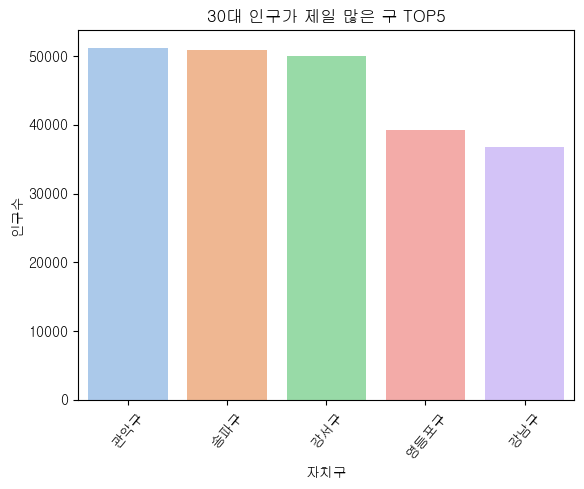

In [19]:
plt.xticks(rotation=50)
sns.barplot(x='자치구',y='인구수',data=df_30_num).set(title='30대 인구가 제일 많은 구 TOP5')
plt.savefig('./BarChart/30대 인구가 제일 많은 구 TOP5.png')

### 40대

In [20]:
# 40대 데이터만 가져오기
df_40 = df_age[df_age.age_group == '40대']

#### 비율

In [21]:
# 비율
df_40_ratio = df_40.sort_values(by=['age_ratio'], ascending=False)
df_40_ratio = df_40_ratio.head(5)
df_40_ratio

,gu,age_group,population,age_ratio
9,중구,40대,10223,7.52
3,종로구,40대,9502,6.38
15,용산구,40대,18855,4.29
105,금천구,40대,18155,3.84
21,성동구,40대,23654,3.32


In [22]:
df_40_ratio.set_index([pd.Index(range(1, 6))], inplace=True)
df_40_ratio.rename(columns={'gu':'자치구', 'age_group':'연령대', 'population':'인구수', 'age_ratio':'연령대별 비율'}, inplace=True)

#### 총 인구수

In [25]:
# 총 인구수
df_40_num = df_40.sort_values(by=['population'], ascending=False)
df_40_num = df_40_num.head(5)
df_40_num

,gu,age_group,population,age_ratio
141,송파구,40대,52144,1.50
93,강서구,40대,46237,1.70
135,강남구,40대,37496,1.89
123,관악구,40대,36408,1.92
147,강동구,40대,35993,2.11


In [26]:
df_40_num.set_index([pd.Index(range(1, 6))], inplace=True)
df_40_num.rename(columns={'gu':'자치구', 'age_group':'연령대', 'population':'인구수', 'age_ratio':'연령대별 비율'}, inplace=True)

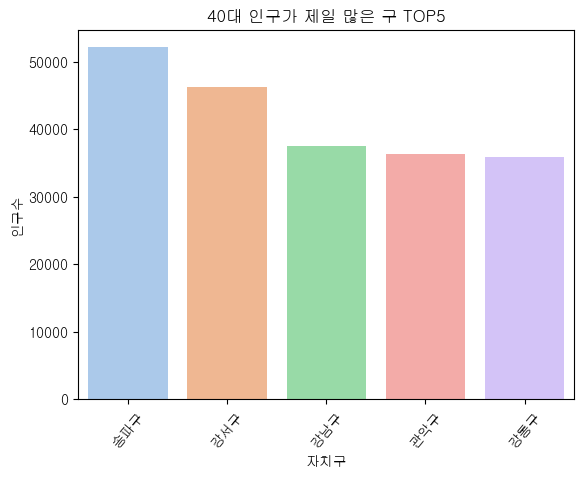

In [29]:
plt.xticks(rotation=50)
sns.barplot(x='자치구',y='인구수',data=df_40_num).set(title='40대 인구가 제일 많은 구 TOP5')
plt.savefig('./BarChart/40대 인구가 제일 많은 구 TOP5.png')

# 2) 어느 구가 여자가 많은지 TOP 5
* 남자/여자 비율
* 여자 총 인구수

In [30]:
# 데이터 불러오기
df_temp = pd.read_csv('./csv/seoul_population.csv', index_col=0)

In [31]:
# 데이터 확인
df_temp

,gu,age_group,population,male,female
0,종로구,20대 미만,18355,9182,9173
1,종로구,20대,28087,13055,15032
2,종로구,30대,10782,5416,5366
3,종로구,40대,9502,4744,4758
4,종로구,50대,9816,4756,5060
...,...,...,...,...,...
145,강동구,20대,58184,28296,29888
146,강동구,30대,33898,16735,17163
147,강동구,40대,35993,17912,18081
148,강동구,50대,37290,18631,18659


In [32]:
# 자치구별 합계 인구수로 축소(연령대 제거)
total_poplis = []
for gu in gu_lis:
    df_t = df_temp[df_temp['gu'] == gu]
    total_poplis.append([gu, df_t.iloc[0:6, 2].sum(), df_t.iloc[0:6, 3].sum(), df_t.iloc[0:6, 4].sum()])
df_female = pd.DataFrame(total_poplis, columns=['gu', 'population', 'male', 'female'])

In [33]:
# 데이터 확인
df_female.head()

,gu,population,male,female
0,종로구,148836,71358,77478
1,중구,126296,60652,65644
2,용산구,221662,106904,114758
3,성동구,286441,139174,147267
4,광진구,347058,166458,180600


In [34]:
# 구별 여성비율 구하기
sex_ratio_lis = []
for i in df_female.index:
        sex_ratio_lis.append(round(((df_female.loc[i, 'female']/df_female.loc[i, 'population'])*100), 2))
print(sex_ratio_lis, len(sex_ratio_lis))

[52.06, 51.98, 51.77, 51.41, 52.04, 51.34, 50.99, 52.37, 51.72, 51.67, 51.94, 52.3, 53.4, 53.21, 51.09, 52.03, 50.19, 49.28, 50.36, 51.73, 50.01, 52.22, 52.12, 51.87, 51.02] 25


In [35]:
# 여성 비율을 데이터 프레임에 추가
sex_ratio = pd.Series(sex_ratio_lis)
df_female.insert(loc=4, column='female_ratio', value=sex_ratio)

#### 비율

In [36]:
# 비율
df_female_ratio = df_female.sort_values(by=['female_ratio'], ascending=False)
df_female_ratio = df_female_ratio.head(5)
df_female_ratio

,gu,population,male,female,female_ratio
12,서대문구,314506,146550,167956,53.40
13,마포구,365159,170859,194300,53.21
7,성북구,435477,207421,228056,52.37
11,은평구,457349,218149,239200,52.30
21,서초구,392264,187426,204838,52.22


In [37]:
df_female_ratio.set_index([pd.Index(range(1, 6))], inplace=True)
df_female_ratio.rename(columns={'gu':'자치구', 'population':'인구수', 'male':'남성 인구수', 'female':'여성 인구수', 'female_ratio':'여성 비율'}, inplace=True)

#### 총 인구수

In [39]:
# 총 인구수
df_female_num = df_female.sort_values(by=['female'], ascending=False)
df_female_num = df_female_num.head(5)
df_female_num

,gu,population,male,female,female_ratio
23,송파구,634665,305438,329227,51.87
15,강서구,559780,268515,291265,52.03
22,강남구,502960,240827,262133,52.12
10,노원구,503863,242163,261700,51.94
20,관악구,495735,247807,247928,50.01


In [40]:
df_female_num.set_index([pd.Index(range(1, 6))], inplace=True)
df_female_num.rename(columns={'gu':'자치구', 'population':'인구수', 'male':'남성 인구수', 'female':'여성 인구수', 'female_ratio':'여성 비율'}, inplace=True)

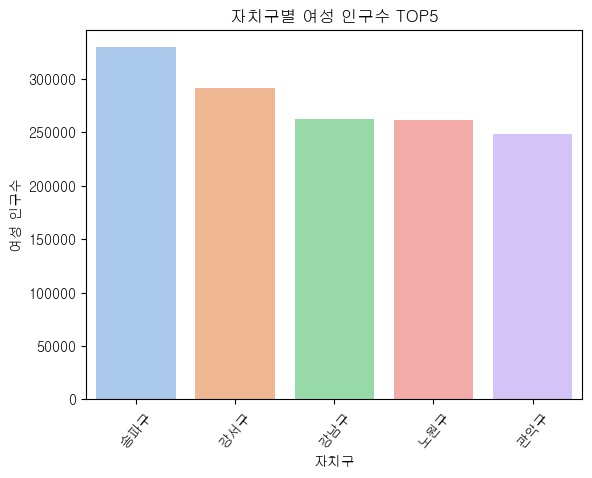

In [41]:
# bar chart로 시각화
plt.xticks(rotation=50)
sns.barplot(x='자치구',y='여성 인구수',data=df_female_num).set(title='자치구별 여성 인구수 TOP5')
plt.savefig('./BarChart/자치구별 여성 인구수 TOP5.png')

# 2-1) 30-40대 여성이 많은 자치구 TOP 5

In [42]:
# 데이터 불러오기
df_as = pd.read_csv('./csv/seoul_population.csv', index_col=0)

In [43]:
# 구별 연령대 비율 구하기
ratio_lis1 = []
for gu in gu_lis:
    df_t = df_as[df_as['gu'] == gu]
    total_pop = df_t['population'].sum()
    ratio_lis1.extend([
        round((df_as.iloc[0, 2]/total_pop)*100, 2), round((df_as.iloc[1, 2]/total_pop)*100, 2), round((df_as.iloc[2, 2]/total_pop)*100, 2), 
        round((df_as.iloc[3, 2]/total_pop)*100, 2), round((df_as.iloc[4, 2]/total_pop)*100, 2), round((df_as.iloc[5, 2]/total_pop)*100, 2)
        ])

In [44]:
# 연령대 비율을 데이터 프레임에 추가
age_ratio1 = pd.Series(ratio_lis1)
df_as.insert(loc=5, column='age_ratio', value=age_ratio1)

In [45]:
# 구별 여성비율 구하기
sex_ratio_lis1 = []
for i in df_as.index:
        sex_ratio_lis1.append(round(((df_as.loc[i, 'female']/df_as.loc[i, 'population'])*100), 2))

In [46]:
# 여성 비율을 데이터 프레임에 추가
sex_ratio1 = pd.Series(sex_ratio_lis1)
df_as.insert(loc=6, column='female_ratio', value=sex_ratio1)

In [47]:
# 데이터 확인
df_as

,gu,age_group,population,male,female,age_ratio,female_ratio
0,종로구,20대 미만,18355,9182,9173,12.33,49.98
1,종로구,20대,28087,13055,15032,18.87,53.52
2,종로구,30대,10782,5416,5366,7.24,49.77
3,종로구,40대,9502,4744,4758,6.38,50.07
4,종로구,50대,9816,4756,5060,6.60,51.55
...,...,...,...,...,...,...,...
145,강동구,20대,58184,28296,29888,6.23,51.37
146,강동구,30대,33898,16735,17163,2.39,50.63
147,강동구,40대,35993,17912,18081,2.11,50.23
148,강동구,50대,37290,18631,18659,2.18,50.04


## 30대 여성

In [48]:
# 30대 데이터만 가져오기
df_as30 = df_as[df_as.age_group == '30대']

#### 비율

In [49]:
# 비율
df_as30_ratio = df_as30.sort_values(by=['female_ratio'], ascending=False)
df_as30_ratio = df_as30_ratio.head(5)
df_as30_ratio

,gu,age_group,population,male,female,age_ratio,female_ratio
80,마포구,30대,32613,15047,17566,2.95,53.86
128,서초구,30대,27464,12822,14642,2.75,53.31
134,강남구,30대,36758,17335,19423,2.14,52.84
140,송파구,30대,50886,24333,26553,1.70,52.18
20,성동구,30대,23416,11288,12128,3.76,51.79


In [50]:
# 내보내기 위한 데이터프레임 정리
df_as30_ratio.set_index([pd.Index(range(1, 6))], inplace=True)
df_as30_ratio.rename(columns={
    'gu':'자치구', 'age_group':'연령대', 'population':'인구수', 'male':'남성 인구수', 'female':'여성 인구수', 'age_ratio':'연령대별 비율', 'female_ratio':'여성 비율'
    }, inplace=True)

#### 총 인구수

In [51]:
# 총 인구수
df_as30_num = df_as30.sort_values(by=['female'], ascending=False)
df_as30_num = df_as30_num.head(5)
df_as30_num

,gu,age_group,population,male,female,age_ratio,female_ratio
140,송파구,30대,50886,24333,26553,1.70,52.18
92,강서구,30대,50053,24745,25308,1.93,50.56
122,관악구,30대,51210,28310,22900,2.17,44.72
134,강남구,30대,36758,17335,19423,2.14,52.84
110,영등포구,30대,39283,19936,19347,2.68,49.25


In [52]:
# 내보내기 위한 데이터프레임 정리
df_as30_num.set_index([pd.Index(range(1, 6))], inplace=True)
df_as30_num.rename(columns={
    'gu':'자치구', 'age_group':'연령대', 'population':'인구수', 'male':'남성 인구수', 'female':'여성 인구수', 'age_ratio':'연령대별 비율', 'female_ratio':'여성 비율'
    }, inplace=True)

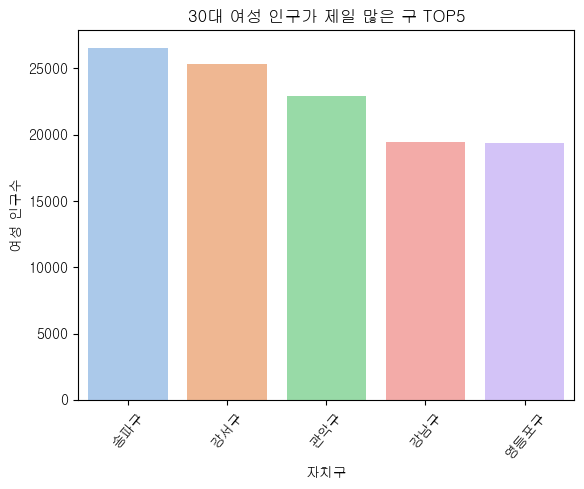

In [54]:
plt.xticks(rotation=50)
sns.barplot(x='자치구',y='여성 인구수',data=df_as30_num).set(title='30대 여성 인구가 제일 많은 구 TOP5')
plt.savefig('./BarChart/30대 여성 인구가 제일 많은 구 TOP5.png')

## 40대 여성

In [55]:
# 40대 데이터만 가져오기
df_as40 = df_as[df_as.age_group == '40대']

#### 비율

In [56]:
# 비율
df_as40_ratio = df_as40.sort_values(by=['female_ratio'], ascending=False)
df_as40_ratio = df_as40_ratio.head(5)
df_as40_ratio

,gu,age_group,population,male,female,age_ratio,female_ratio
135,강남구,40대,37496,17179,20317,1.89,54.18
129,서초구,40대,29554,13675,15879,2.42,53.73
141,송파구,40대,52144,25022,27122,1.50,52.01
81,마포구,40대,30990,15004,15986,2.60,51.58
87,양천구,40대,28512,13947,14565,2.19,51.08


In [57]:
# 내보내기 위한 데이터프레임 정리
df_as40_ratio.set_index([pd.Index(range(1, 6))], inplace=True)
df_as40_ratio.rename(columns={
    'gu':'자치구', 'age_group':'연령대', 'population':'인구수', 'male':'남성 인구수', 'female':'여성 인구수', 'age_ratio':'연령대별 비율', 'female_ratio':'여성 비율'
    }, inplace=True)

#### 총 인구수

In [58]:
# 총 인구수
df_as40_num = df_as40.sort_values(by=['female'], ascending=False)
df_as40_num = df_as40_num.head(5)
df_as40_num

,gu,age_group,population,male,female,age_ratio,female_ratio
141,송파구,40대,52144,25022,27122,1.50,52.01
93,강서구,40대,46237,23673,22564,1.70,48.80
135,강남구,40대,37496,17179,20317,1.89,54.18
147,강동구,40대,35993,17912,18081,2.11,50.23
69,은평구,40대,32890,16380,16510,2.08,50.20


In [59]:
# 내보내기 위한 데이터프레임 정리
df_as40_num.set_index([pd.Index(range(1, 6))], inplace=True)
df_as40_num.rename(columns={
    'gu':'자치구', 'age_group':'연령대', 'population':'인구수', 'male':'남성 인구수', 'female':'여성 인구수', 'age_ratio':'연령대별 비율', 'female_ratio':'여성 비율'
    }, inplace=True)

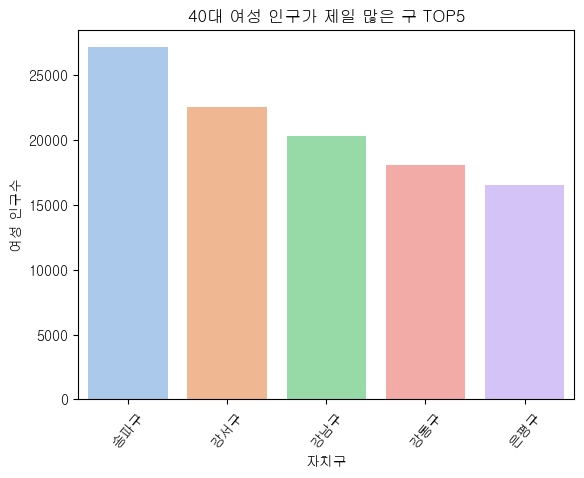

In [61]:
plt.xticks(rotation=50)
sns.barplot(x='자치구',y='여성 인구수',data=df_as40_num).set(title='40대 여성 인구가 제일 많은 구 TOP5')
plt.savefig('./BarChart/40대 여성 인구가 제일 많은 구 TOP5.png')

# 3) 구별 많은 업종 TOP 5
* 강남 근처
* 송파, 서초, 성동, 용산, 광진

In [18]:
# 데이터 불러오기
df_gu = pd.read_csv('D:/박상춘/프로젝트/sales_project/data_preprocessing/csv/place_location(full).csv')

In [19]:
# 필요없는 컬럼 제거
df_gu.drop(['place_name', 'address', 'lat', 'lng'], axis=1, inplace=True)

## 강남구

In [20]:
# 자치구 선정
user_gu = '강남구'

In [21]:
df_gu

,food,gu
0,아시안/양식,종로구
1,찜탕,강북구
2,한식,도봉구
3,한식,중랑구
4,회,성북구
...,...,...
18397,돈까스/일식,강서구
18398,돈까스/일식,강서구
18399,찜탕,강서구
18400,돈까스/일식,강서구


In [66]:
df_gu_gn = df_gu[df_gu['gu'] == user_gu].groupby(['food']).count().sort_values(by=['gu'], ascending=False)
df_gu_gn

,gu
food,
한식,540
아시안/양식,352
돈까스/일식,229
분식,104
중식,99
카페/디저트,79
치킨,57
야식,56
찜탕,56


In [67]:
# 인덱스 새로 생성
df_gu_gn.reset_index(inplace=True)

In [68]:
# 컬럼명 변경 및 인덱스 리셋
df_gu_gn.rename(columns={'food':'업종', 'gu':'식당수'}, inplace=True)
df_gu_gn.set_index([pd.Index(range(1, 15))], inplace=True)

In [69]:
# 데이터 확인
df_gu_gn

,업종,식당수
1,한식,540
2,아시안/양식,352
3,돈까스/일식,229
4,분식,104
5,중식,99
6,카페/디저트,79
7,치킨,57
8,야식,56
9,찜탕,56
10,패스트푸드,48


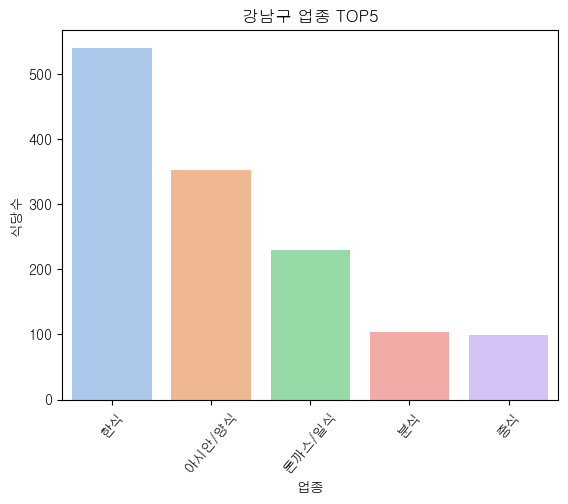

In [70]:
plt.xticks(rotation=50)
sns.barplot(x='업종',y='식당수',data=df_gu_gn.head(5)).set(title='강남구 업종 TOP5')
plt.savefig('./BarChart/강남구 업종 TOP5.png')

## 송파구

In [71]:
# 자치구 선정
user_gu = '송파구'

In [72]:
df_gu_sp = df_gu[df_gu['gu'] == user_gu].groupby(['food']).count().sort_values(by=['gu'], ascending=False)
df_gu_sp

,gu
food,
한식,298
아시안/양식,129
돈까스/일식,127
치킨,97
분식,76
카페/디저트,63
중식,56
찜탕,52
야식,45


In [73]:
# 인덱스 새로 생성
df_gu_sp.reset_index(inplace=True)

In [74]:
# 컬럼명 변경 및 인덱스 리셋
df_gu_sp.rename(columns={'food':'업종', 'gu':'식당수'}, inplace=True)
df_gu_sp.set_index([pd.Index(range(1, 15))], inplace=True)

In [75]:
# 데이터 확인
df_gu_sp

,업종,식당수
1,한식,298
2,아시안/양식,129
3,돈까스/일식,127
4,치킨,97
5,분식,76
6,카페/디저트,63
7,중식,56
8,찜탕,52
9,야식,45
10,패스트푸드,37


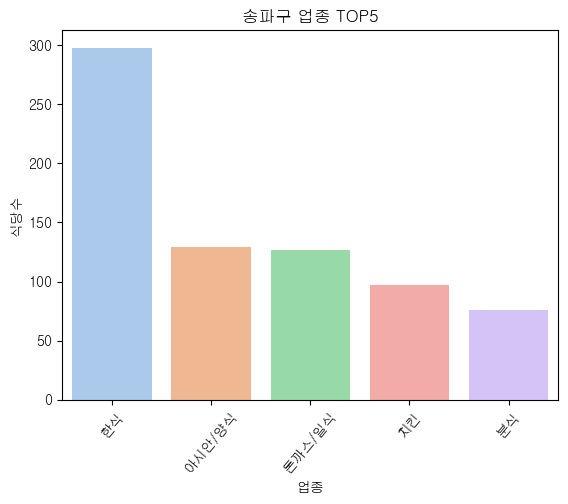

In [76]:
plt.xticks(rotation=50)
sns.barplot(x='업종',y='식당수',data=df_gu_sp.head(5)).set(title='송파구 업종 TOP5')
plt.savefig('./BarChart/송파구 업종 TOP5.png')

## 서초구

In [77]:
# 자치구 선정
user_gu = '서초구'

In [78]:
df_gu_sc = df_gu[df_gu['gu'] == user_gu].groupby(['food']).count().sort_values(by=['gu'], ascending=False)
df_gu_sc

,gu
food,
한식,199
아시안/양식,119
돈까스/일식,93
카페/디저트,57
중식,46
분식,33
치킨,28
패스트푸드,28
족발/보쌈,22


In [79]:
# 인덱스 새로 생성
df_gu_sc.reset_index(inplace=True)

In [80]:
# 컬럼명 변경 및 인덱스 리셋
df_gu_sc.rename(columns={'food':'업종', 'gu':'식당수'}, inplace=True)
df_gu_sc.set_index([pd.Index(range(1, 15))], inplace=True)

In [81]:
# 데이터 확인
df_gu_sc

,업종,식당수
1,한식,199
2,아시안/양식,119
3,돈까스/일식,93
4,카페/디저트,57
5,중식,46
6,분식,33
7,치킨,28
8,패스트푸드,28
9,족발/보쌈,22
10,야식,20


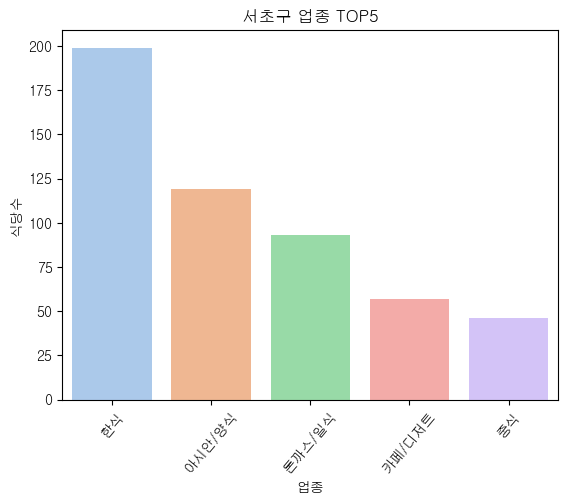

In [82]:
plt.xticks(rotation=50)
sns.barplot(x='업종',y='식당수',data=df_gu_sc.head(5)).set(title='서초구 업종 TOP5')
plt.savefig('./BarChart/서초구 업종 TOP5.png')

## 성동구

In [83]:
# 자치구 선정
user_gu = '성동구'

In [84]:
df_gu_sd = df_gu[df_gu['gu'] == user_gu].groupby(['food']).count().sort_values(by=['gu'], ascending=False)
df_gu_sd

,gu
food,
한식,123
아시안/양식,99
돈까스/일식,60
카페/디저트,50
족발/보쌈,28
야식,24
분식,22
찜탕,20
피자,20


In [85]:
# 인덱스 새로 생성
df_gu_sd.reset_index(inplace=True)

In [86]:
# 컬럼명 변경 및 인덱스 리셋
df_gu_sd.rename(columns={'food':'업종', 'gu':'식당수'}, inplace=True)
df_gu_sd.set_index([pd.Index(range(1, 15))], inplace=True)

In [87]:
# 데이터 확인
df_gu_sd

,업종,식당수
1,한식,123
2,아시안/양식,99
3,돈까스/일식,60
4,카페/디저트,50
5,족발/보쌈,28
6,야식,24
7,분식,22
8,찜탕,20
9,피자,20
10,치킨,19


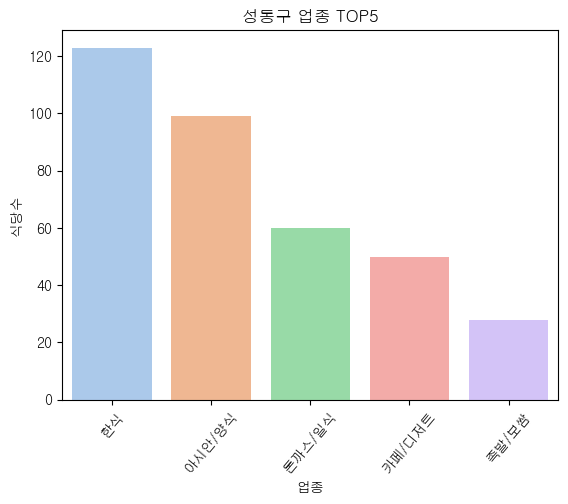

In [88]:
plt.xticks(rotation=50)
sns.barplot(x='업종',y='식당수',data=df_gu_sd.head(5)).set(title='성동구 업종 TOP5')
plt.savefig('./BarChart/성동구 업종 TOP5.png')

## 용산구

In [22]:
# 자치구 선정
user_gu = '용산구'

In [23]:
df_gu_ys = df_gu[df_gu['gu'] == user_gu].groupby(['food']).count().sort_values(by=['gu'], ascending=False)
df_gu_ys

,gu
food,
아시안/양식,237
한식,151
카페/디저트,76
돈까스/일식,67
중식,29
패스트푸드,27
야식,22
피자,22
치킨,21


In [24]:
# 인덱스 새로 생성
df_gu_ys.reset_index(inplace=True)

In [25]:
# 컬럼명 변경 및 인덱스 리셋
df_gu_ys.rename(columns={'food':'업종', 'gu':'식당수'}, inplace=True)
df_gu_ys.set_index([pd.Index(range(1, 15))], inplace=True)

In [26]:
# 데이터 확인
df_gu_ys

,업종,식당수
1,아시안/양식,237
2,한식,151
3,카페/디저트,76
4,돈까스/일식,67
5,중식,29
6,패스트푸드,27
7,야식,22
8,피자,22
9,치킨,21
10,족발/보쌈,20


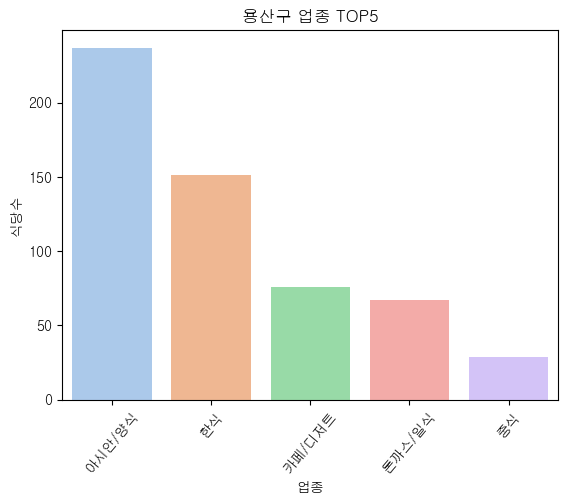

In [27]:
plt.xticks(rotation=50)
sns.barplot(x='업종',y='식당수',data=df_gu_ys.head(5)).set(title='용산구 업종 TOP5')
plt.savefig('./plot/BarChart/용산구 업종 TOP5.png')

## 광진구

In [28]:
# 자치구 선정
user_gu = '광진구'

In [29]:
df_gu_gj = df_gu[df_gu['gu'] == user_gu].groupby(['food']).count().sort_values(by=['gu'], ascending=False)
df_gu_gj

,gu
food,
한식,185
아시안/양식,94
돈까스/일식,64
분식,59
중식,42
치킨,42
찜탕,35
카페/디저트,32
족발/보쌈,31


In [30]:
# 인덱스 새로 생성
df_gu_gj.reset_index(inplace=True)

In [31]:
# 컬럼명 변경 및 인덱스 리셋
df_gu_gj.rename(columns={'food':'업종', 'gu':'식당수'}, inplace=True)
df_gu_gj.set_index([pd.Index(range(1, 15))], inplace=True)

In [32]:
# 데이터 확인
df_gu_gj

,업종,식당수
1,한식,185
2,아시안/양식,94
3,돈까스/일식,64
4,분식,59
5,중식,42
6,치킨,42
7,찜탕,35
8,카페/디저트,32
9,족발/보쌈,31
10,야식,21


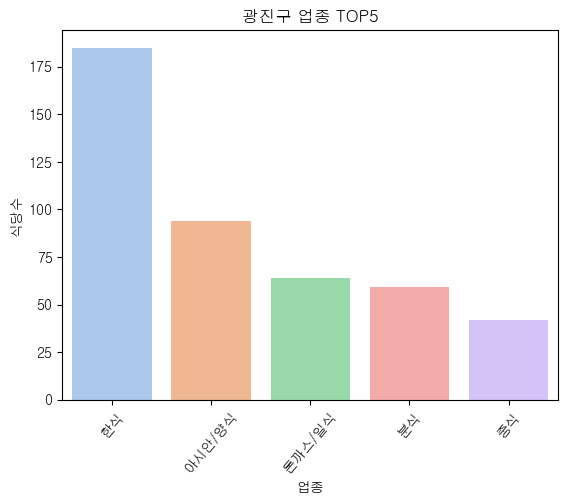

In [33]:
plt.xticks(rotation=50)
sns.barplot(x='업종',y='식당수',data=df_gu_gj.head(5)).set(title='광진구 업종 TOP5')
plt.savefig('./plot/BarChart/광진구 업종 TOP5.png')

## 총

In [101]:
# 각 데이터 프레임에 자치구 컬럼 추가
df_gu_gn['자치구'] = '강남구'
df_gu_sp['자치구'] = '송파구'
df_gu_sc['자치구'] = '서초구'
df_gu_sd['자치구'] = '성동구'
df_gu_ys['자치구'] = '용산구'
df_gu_gj['자치구'] = '광진구'

In [102]:
# 데이터 프레임 합치기
df_gu_all = pd.concat([df_gu_gn, df_gu_sp, df_gu_sc, df_gu_sd, df_gu_ys, df_gu_gj])

In [103]:
df_gu_all = df_gu_all.sort_values(by=['식당수'], ascending=False)
df_gu_all.set_index([pd.Index(range(1, df_gu_all.자치구.count()+1))], inplace=True)

In [104]:
# 데이터 확인
df_gu_all

,업종,식당수,자치구
1,한식,540,강남구
2,아시안/양식,352,강남구
3,한식,298,송파구
4,아시안/양식,237,용산구
5,돈까스/일식,229,강남구
...,...,...,...
80,도시락,11,성동구
81,회,11,용산구
82,도시락,5,용산구
83,회,5,성동구


In [105]:
df_gu_all = df_gu_all.head(5)

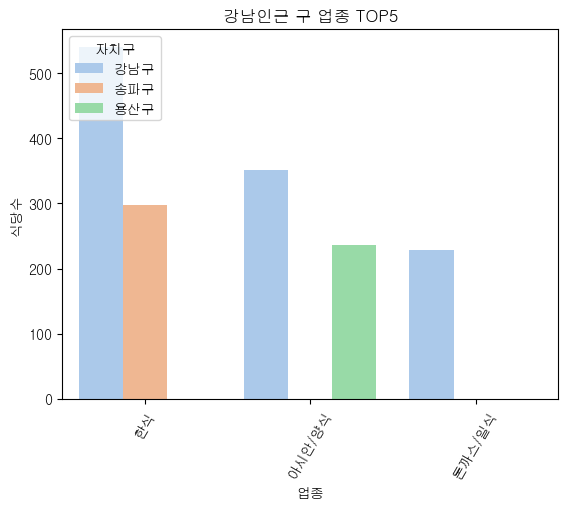

In [106]:
plt.xticks(rotation=60)
sns.barplot(x='업종',y='식당수',hue='자치구',data=df_gu_all).set(title='강남인근 구 업종 TOP5')
plt.savefig('./BarChart/강남인근 구 업종 TOP5.png')

# 4) 업종별 많이 위치한 구 TOP 5
* 치킨

In [5]:
# 데이터 불러오기
df_food = pd.read_csv('D:/박상춘/프로젝트/sales_project/data_preprocessing/csv/place_location(full).csv')

In [6]:
# 필요없는 컬럼 제거
df_food.drop(['place_name', 'address', 'lat', 'lng'], axis=1, inplace=True)

## 치킨

In [7]:
df_food_c = df_food[df_food['food'] == '치킨'] # 치킨 업종 선정

In [8]:
df_food_c = df_food_c.groupby(['gu']).count().sort_values(by=['food'], ascending=False)

In [9]:
# 인덱스 새로 생성
df_food_c.reset_index(inplace=True)

In [10]:
# 컬럼명 변경 및 인덱스 리셋
df_food_c.rename(columns={'gu':'자치구', 'food':'식당수'}, inplace=True)
df_food_c.set_index([pd.Index(range(1, 26))], inplace=True)

In [11]:
# 데이터 확인
df_food_c

,자치구,식당수
1,송파구,97
2,관악구,90
3,영등포구,88
4,마포구,73
5,동작구,68
6,구로구,64
7,강서구,61
8,양천구,61
9,성북구,58
10,강동구,58


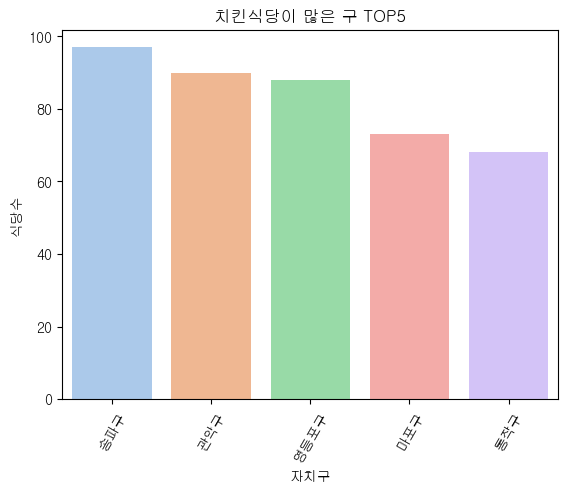

In [114]:
plt.xticks(rotation=60)
sns.barplot(x='자치구',y='식당수',data=df_food_c.head(5)).set(title='치킨식당이 많은 구 TOP5')
plt.savefig('./BarChart/치킨식당이 많은 구 TOP5.png')

In [12]:
df_food_c = df_food_c.sort_values(by=['식당수']).set_index([pd.Index(range(1, 26))]).head(5)

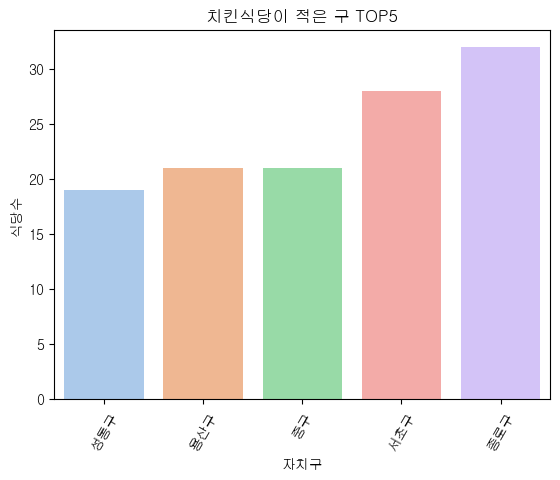

In [16]:
plt.xticks(rotation=60)
sns.barplot(x='자치구',y='식당수',data=df_food_c.head(5)).set(title='치킨식당이 적은 구 TOP5')
plt.savefig('./plot/BarChart/치킨식당이 적은 구 TOP5.png')

# 5) 구별 평균 평점 높은/낮은 업종 TOP 5
* 강남 근처
* 송파, 서초, 성동, 용산, 광진

In [115]:
# 데이터 불러오기
df_gu_r = pd.read_csv('./rating_crawling.csv', index_col=0)

In [116]:
# 필요없는 컬럼 제거
df_gu_r.drop(['name', 'address', 'lat', 'lng'], axis=1, inplace=True)

In [117]:
# 데이터 확인
df_gu_r

,gu,food,rating
0,강북구,치킨,4.30
1,종로구,치킨,4.34
2,종로구,치킨,4.38
3,용산구,피자,4.47
4,중구,야식,4.27
...,...,...,...
9093,강서구,돈까스/일식,4.44
9094,강서구,돈까스/일식,4.40
9095,강서구,찜탕,4.31
9096,강서구,돈까스/일식,4.37


## 강남구

In [118]:
# 자치구 선정
user_gu = '강남구'

In [119]:
# 강남구 데이터만 추출
df_gu_r_gn = df_gu_r[df_gu_r['gu'] == user_gu]

In [120]:
# 업종별 평균 평점
df_gu_r_gn = df_gu_r_gn.groupby('food').rating.mean().to_frame().sort_values(by=['rating'], ascending=False)

In [121]:
# 인덱스 새로 생성
df_gu_r_gn.reset_index(inplace=True)

In [122]:
# 데이터 확인
df_gu_r_gn

,food,rating
0,피자,4.516471
1,아시안/양식,4.503675
2,야식,4.483913
3,돈까스/일식,4.483534
4,카페/디저트,4.466000
5,찜탕,4.451818
6,족발/보쌈,4.427317
7,도시락,4.424615
8,중식,4.417656
9,회,4.405000


In [123]:
# 컬럼명 변경 및 인덱스 리셋
df_gu_r_gn.rename(columns={'food':'업종', 'rating':'평균 평점'}, inplace=True)
df_gu_r_gn.set_index([pd.Index(range(1, 15))], inplace=True)

In [124]:
# 평점을 소수점 두자리로 축소
for i in df_gu_r_gn.index:
    df_gu_r_gn.loc[i, '평균 평점'] = round(df_gu_r_gn.loc[i, '평균 평점'], 2)

In [125]:
# 데이터 확인
df_gu_r_gn

,업종,평균 평점
1,피자,4.52
2,아시안/양식,4.50
3,야식,4.48
4,돈까스/일식,4.48
5,카페/디저트,4.47
6,찜탕,4.45
7,족발/보쌈,4.43
8,도시락,4.42
9,중식,4.42
10,회,4.40


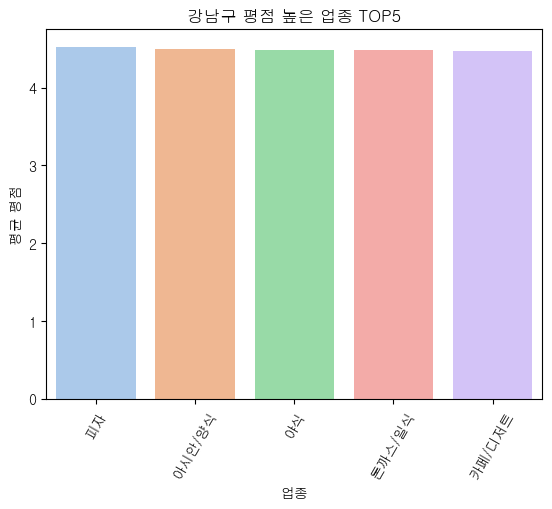

In [150]:
from matplotlib.ticker import FormatStrFormatter
plt.xticks(rotation=60)
sns.barplot(x='업종',y='평균 평점',data=df_gu_r_gn.head(5)).set(title='강남구 평점 높은 업종 TOP5')
plt.savefig('./BarChart/강남구 평점 높은 업종 TOP5.png')

## 송파구

In [151]:
# 자치구 선정
user_gu = '송파구'

In [152]:
# 송파구 데이터만 추출
df_gu_r_sp = df_gu_r[df_gu_r['gu'] == user_gu]

In [153]:
# 업종별 평균 평점
df_gu_r_sp = df_gu_r_sp.groupby('food').rating.mean().to_frame().sort_values(by=['rating'], ascending=False)

In [154]:
# 인덱스 새로 생성
df_gu_r_sp.reset_index(inplace=True)

In [155]:
# 데이터 확인
df_gu_r_sp

,food,rating
0,카페/디저트,4.740000
1,아시안/양식,4.525217
2,야식,4.479032
3,돈까스/일식,4.464386
4,족발/보쌈,4.446538
5,한식,4.432593
6,치킨,4.422308
7,피자,4.418947
8,회,4.416552
9,분식,4.398049


In [156]:
# 컬럼명 변경 및 인덱스 리셋
df_gu_r_sp.rename(columns={'food':'업종', 'rating':'평균 평점'}, inplace=True)
df_gu_r_sp.set_index([pd.Index(range(1, 15))], inplace=True)

In [157]:
# 평점을 소수점 두자리로 축소
for i in df_gu_r_sp.index:
    df_gu_r_sp.loc[i, '평균 평점'] = round(df_gu_r_sp.loc[i, '평균 평점'], 2)

In [158]:
# 데이터 확인
df_gu_r_sp

,업종,평균 평점
1,카페/디저트,4.74
2,아시안/양식,4.53
3,야식,4.48
4,돈까스/일식,4.46
5,족발/보쌈,4.45
6,한식,4.43
7,치킨,4.42
8,피자,4.42
9,회,4.42
10,분식,4.40


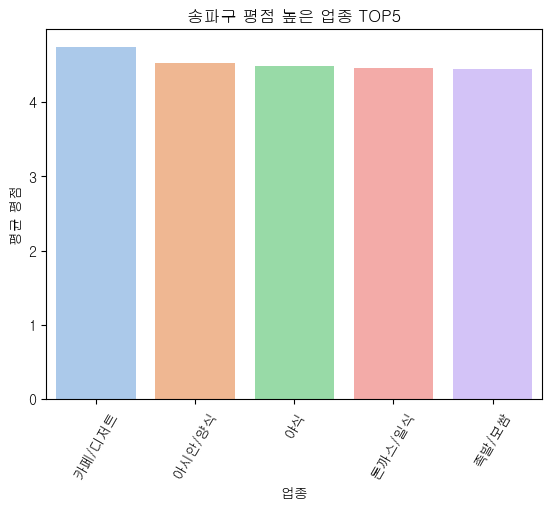

In [160]:
plt.xticks(rotation=60)
sns.barplot(x='업종',y='평균 평점',data=df_gu_r_sp.head(5)).set(title='송파구 평점 높은 업종 TOP5')
plt.savefig('./BarChart/송파구 평점 높은 업종 TOP5.png')

## 서초구

In [161]:
# 자치구 선정
user_gu = '서초구'

In [162]:
# 서초구 데이터만 추출
df_gu_r_sc = df_gu_r[df_gu_r['gu'] == user_gu]

In [163]:
# 업종별 평균 평점
df_gu_r_sc = df_gu_r_sc.groupby('food').rating.mean().to_frame().sort_values(by=['rating'], ascending=False)

In [164]:
# 인덱스 새로 생성
df_gu_r_sc.reset_index(inplace=True)

In [165]:
# 데이터 확인
df_gu_r_sc

,food,rating
0,회,4.587500
1,카페/디저트,4.570000
2,아시안/양식,4.498974
3,피자,4.467500
4,돈까스/일식,4.445091
5,치킨,4.426429
6,분식,4.425714
7,한식,4.399231
8,족발/보쌈,4.391905
9,중식,4.387037


In [166]:
# 컬럼명 변경 및 인덱스 리셋
df_gu_r_sc.rename(columns={'food':'업종', 'rating':'평균 평점'}, inplace=True)
df_gu_r_sc.set_index([pd.Index(range(1, 15))], inplace=True)

In [167]:
# 평점을 소수점 두자리로 축소
for i in df_gu_r_sc.index:
    df_gu_r_sc.loc[i, '평균 평점'] = round(df_gu_r_sc.loc[i, '평균 평점'], 2)

In [168]:
# 데이터 확인
df_gu_r_sc

,업종,평균 평점
1,회,4.59
2,카페/디저트,4.57
3,아시안/양식,4.50
4,피자,4.47
5,돈까스/일식,4.45
6,치킨,4.43
7,분식,4.43
8,한식,4.40
9,족발/보쌈,4.39
10,중식,4.39


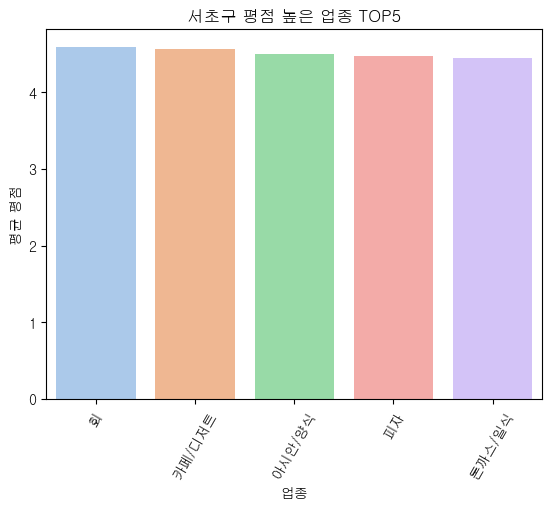

In [169]:
plt.xticks(rotation=60)
sns.barplot(x='업종',y='평균 평점',data=df_gu_r_sc.head(5)).set(title='서초구 평점 높은 업종 TOP5')
plt.savefig('./BarChart/서초구 평점 높은 업종 TOP5.png')

## 성동구

In [170]:
# 자치구 선정
user_gu = '성동구'

In [171]:
# 성동구 데이터만 추출
df_gu_r_sd = df_gu_r[df_gu_r['gu'] == user_gu]

In [172]:
# 업종별 평균 평점
df_gu_r_sd = df_gu_r_sd.groupby('food').rating.mean().to_frame().sort_values(by=['rating'], ascending=False)

In [173]:
# 인덱스 새로 생성
df_gu_r_sd.reset_index(inplace=True)

In [174]:
# 데이터 확인
df_gu_r_sd

,food,rating
0,아시안/양식,4.575882
1,카페/디저트,4.535714
2,피자,4.528571
3,패스트푸드,4.512857
4,돈까스/일식,4.508333
5,야식,4.485882
6,분식,4.456667
7,한식,4.429070
8,찜탕,4.425000
9,치킨,4.416364


In [175]:
# 컬럼명 변경 및 인덱스 리셋
df_gu_r_sd.rename(columns={'food':'업종', 'rating':'평균 평점'}, inplace=True)
df_gu_r_sd.set_index([pd.Index(range(1, 15))], inplace=True)

In [176]:
# 평점을 소수점 두자리로 축소
for i in df_gu_r_sd.index:
    df_gu_r_sd.loc[i, '평균 평점'] = round(df_gu_r_sd.loc[i, '평균 평점'], 2)

In [177]:
# 데이터 확인
df_gu_r_sd

,업종,평균 평점
1,아시안/양식,4.58
2,카페/디저트,4.54
3,피자,4.53
4,패스트푸드,4.51
5,돈까스/일식,4.51
6,야식,4.49
7,분식,4.46
8,한식,4.43
9,찜탕,4.42
10,치킨,4.42


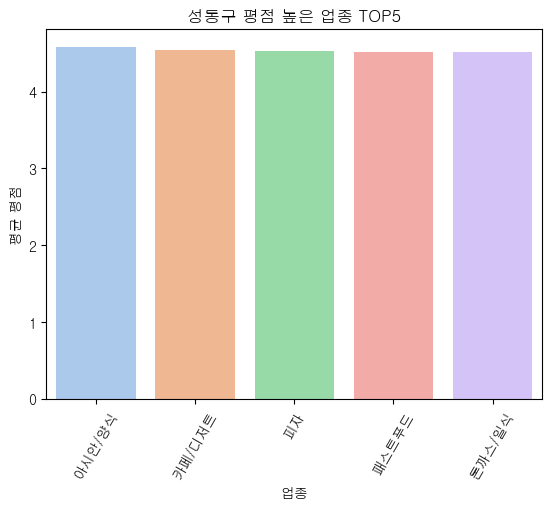

In [178]:
plt.xticks(rotation=60)
sns.barplot(x='업종',y='평균 평점',data=df_gu_r_sd.head(5)).set(title='성동구 평점 높은 업종 TOP5')
plt.savefig('./BarChart/성동구 평점 높은 업종 TOP5.png')

## 용산구

In [179]:
# 자치구 선정
user_gu = '용산구'

In [180]:
# 용산구 데이터만 추출
df_gu_r_ys = df_gu_r[df_gu_r['gu'] == user_gu]

In [181]:
# 업종별 평균 평점
df_gu_r_ys = df_gu_r_ys.groupby('food').rating.mean().to_frame().sort_values(by=['rating'], ascending=False)

In [182]:
# 인덱스 새로 생성
df_gu_r_ys.reset_index(inplace=True)

In [183]:
# 데이터 확인
df_gu_r_ys

,food,rating
0,피자,4.562632
1,야식,4.558824
2,아시안/양식,4.491897
3,카페/디저트,4.487045
4,패스트푸드,4.435833
5,분식,4.430000
6,한식,4.426279
7,족발/보쌈,4.423684
8,돈까스/일식,4.407188
9,찜탕,4.400000


In [184]:
# 컬럼명 변경 및 인덱스 리셋
df_gu_r_ys.rename(columns={'food':'업종', 'rating':'평균 평점'}, inplace=True)
df_gu_r_ys.set_index([pd.Index(range(1, 15))], inplace=True)

In [185]:
# 평점을 소수점 두자리로 축소
for i in df_gu_r_ys.index:
    df_gu_r_ys.loc[i, '평균 평점'] = round(df_gu_r_ys.loc[i, '평균 평점'], 2)

In [186]:
# 데이터 확인
df_gu_r_ys

,업종,평균 평점
1,피자,4.56
2,야식,4.56
3,아시안/양식,4.49
4,카페/디저트,4.49
5,패스트푸드,4.44
6,분식,4.43
7,한식,4.43
8,족발/보쌈,4.42
9,돈까스/일식,4.41
10,찜탕,4.40


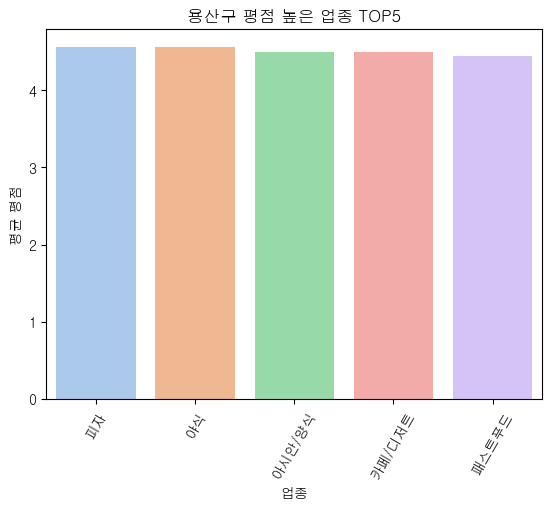

In [187]:
plt.xticks(rotation=60)
sns.barplot(x='업종',y='평균 평점',data=df_gu_r_ys.head(5)).set(title='용산구 평점 높은 업종 TOP5')
plt.savefig('./BarChart/용산구 평점 높은 업종 TOP5.png')

## 광진구

In [188]:
# 자치구 선정
user_gu = '광진구'

In [189]:
# 광진구 데이터만 추출
df_gu_r_gj = df_gu_r[df_gu_r['gu'] == user_gu]

In [190]:
# 업종별 평균 평점
df_gu_r_gj = df_gu_r_gj.groupby('food').rating.mean().to_frame().sort_values(by=['rating'], ascending=False)

In [191]:
# 인덱스 새로 생성
df_gu_r_gj.reset_index(inplace=True)

In [192]:
# 데이터 확인
df_gu_r_gj

,food,rating
0,카페/디저트,4.793333
1,아시안/양식,4.509556
2,피자,4.477500
3,돈까스/일식,4.475758
4,야식,4.458667
5,중식,4.458462
6,한식,4.448571
7,치킨,4.438571
8,족발/보쌈,4.424667
9,찜탕,4.391818


In [193]:
# 컬럼명 변경 및 인덱스 리셋
df_gu_r_gj.rename(columns={'food':'업종', 'rating':'평균 평점'}, inplace=True)
df_gu_r_gj.set_index([pd.Index(range(1, 15))], inplace=True)

In [194]:
# 평점을 소수점 두자리로 축소
for i in df_gu_r_gj.index:
    df_gu_r_gj.loc[i, '평균 평점'] = round(df_gu_r_gj.loc[i, '평균 평점'], 2)

In [195]:
# 데이터 확인
df_gu_r_gj

,업종,평균 평점
1,카페/디저트,4.79
2,아시안/양식,4.51
3,피자,4.48
4,돈까스/일식,4.48
5,야식,4.46
6,중식,4.46
7,한식,4.45
8,치킨,4.44
9,족발/보쌈,4.42
10,찜탕,4.39


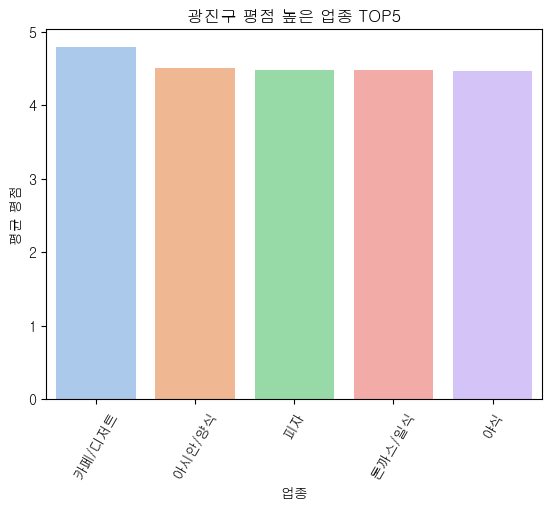

In [196]:
plt.xticks(rotation=60)
sns.barplot(x='업종',y='평균 평점',data=df_gu_r_gj.head(5)).set(title='광진구 평점 높은 업종 TOP5')
plt.savefig('./BarChart/광진구 평점 높은 업종 TOP5.png')

## 총

In [197]:
# 각 데이터 프레임에 자치구 컬럼 추가
df_gu_r_gn['자치구'] = '강남구'
df_gu_r_sp['자치구'] = '송파구'
df_gu_r_sc['자치구'] = '서초구'
df_gu_r_sd['자치구'] = '성동구'
df_gu_r_ys['자치구'] = '용산구'
df_gu_r_gj['자치구'] = '광진구'

In [198]:
# 데이터 프레임 합치기
df_gu_r_all = pd.concat([df_gu_r_gn, df_gu_r_sp, df_gu_r_sc, df_gu_r_sd, df_gu_r_ys, df_gu_r_gj])

In [199]:
df_gu_r_all = df_gu_r_all.sort_values(by=['평균 평점'], ascending=False)
df_gu_r_all.set_index([pd.Index(range(1, df_gu_r_all.자치구.count()+1))], inplace=True)

In [200]:
# 데이터 확인
df_gu_r_all

,업종,평균 평점,자치구
1,카페/디저트,4.79,광진구
2,카페/디저트,4.74,송파구
3,회,4.59,서초구
4,아시안/양식,4.58,성동구
5,카페/디저트,4.57,서초구
...,...,...,...
80,중식,4.33,성동구
81,패스트푸드,4.32,광진구
82,도시락,4.30,성동구
83,도시락,4.26,용산구


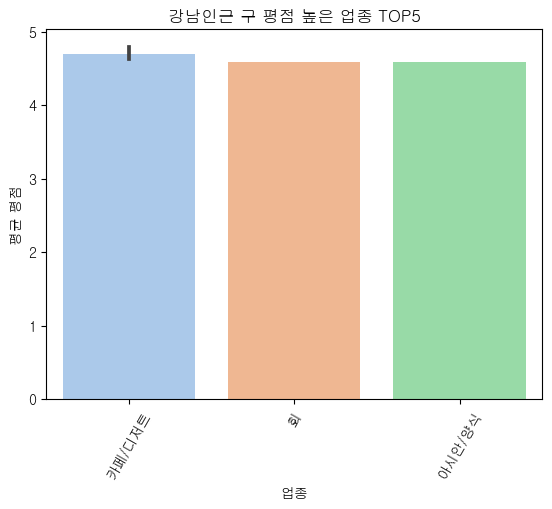

In [201]:
plt.xticks(rotation=60)
sns.barplot(x='업종',y='평균 평점',data=df_gu_r_all.head(5)).set(title='강남인근 구 평점 높은 업종 TOP5')
plt.savefig('./BarChart/강남인근 구 평점 높은 업종 TOP5.png')

# 6) 업종별 평균적으로 평점 높이/낮게 준 구 TOP 5
* 치킨

In [202]:
# 데이터 불러오기
df_food_r = pd.read_csv('./rating_crawling.csv', index_col=0)

In [203]:
# 필요없는 컬럼 제거
df_food_r.drop(['name', 'address', 'lat', 'lng'], axis=1, inplace=True)

In [204]:
df_food_r

,gu,food,rating
0,강북구,치킨,4.30
1,종로구,치킨,4.34
2,종로구,치킨,4.38
3,용산구,피자,4.47
4,중구,야식,4.27
...,...,...,...
9093,강서구,돈까스/일식,4.44
9094,강서구,돈까스/일식,4.40
9095,강서구,찜탕,4.31
9096,강서구,돈까스/일식,4.37


## 치킨

In [205]:
df_food_r_c = df_food_r[df_food_r['food'] == '치킨'] # 치킨 업종 선정

In [206]:
# 업종별 평균 평점
df_food_r_c = df_food_r_c.groupby('gu').rating.mean().to_frame()

In [207]:
# 인덱스 새로 생성
df_food_r_c.reset_index(inplace=True)

In [208]:
# 컬럼명 변경
df_food_r_c.rename(columns={'gu':'자치구', 'rating':'평균 평점'}, inplace=True)

In [209]:
# 평점을 소수점 두자리로 축소
for i in df_food_r_c.index:
    df_food_r_c.loc[i, '평균 평점'] = round(df_food_r_c.loc[i, '평균 평점'], 2)

In [210]:
# 데이터 확인
df_food_r_c

,자치구,평균 평점
0,강남구,4.39
1,강동구,4.42
2,강북구,4.34
3,강서구,4.37
4,관악구,4.42
5,광진구,4.44
6,구로구,4.38
7,금천구,4.39
8,노원구,4.39
9,도봉구,4.38


### 높은 평점

In [211]:
df_food_r_c_high = df_food_r_c.sort_values(by=['평균 평점'], ascending=False)
df_food_r_c_high.set_index([pd.Index(range(1, 26))], inplace=True)

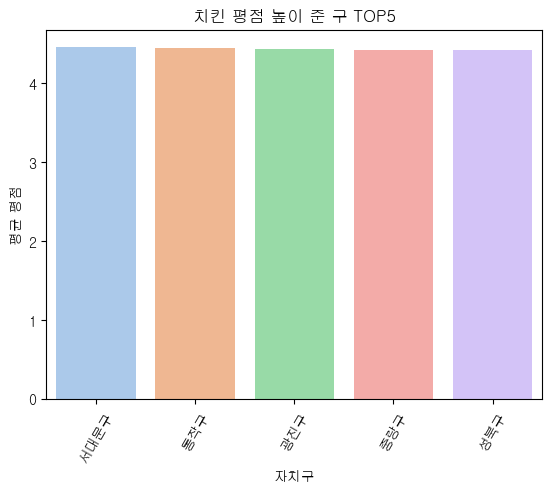

In [212]:
plt.xticks(rotation=60)
sns.barplot(x='자치구',y='평균 평점',data=df_food_r_c_high.head(5)).set(title='치킨 평점 높이 준 구 TOP5')
plt.savefig('./BarChart/치킨 평점 높이 준 구 TOP5.png')

### 낮은 평점

In [214]:
df_food_r_c_low = df_food_r_c.sort_values(by=['평균 평점'], ascending=True)
df_food_r_c_low.set_index([pd.Index(range(1, 26))], inplace=True)

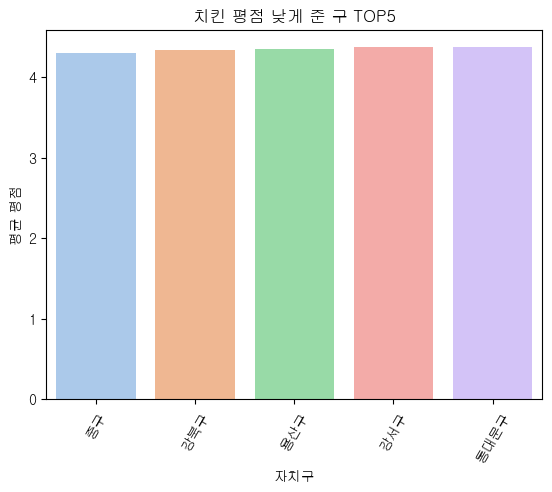

In [216]:
plt.xticks(rotation=60)
sns.barplot(x='자치구',y='평균 평점',data=df_food_r_c_low.head(5)).set(title='치킨 평점 낮게 준 구 TOP5')
plt.savefig('./BarChart/치킨 평점 낮게 준 구 TOP5.png')

# 7) 구별 업종식당수와 주문건수의 비율 높은 업종 TOP 5
* 강남 근처
* 송파, 서초, 성동, 용산, 광진

In [264]:
# 데이터 불러오기
df_order = pd.read_csv('./csv/time_int_order.csv', index_col=0)

In [265]:
# 불필요한 컬럼 제거
df_order.drop(['date', 'time_int', 'avg_order_amt'], axis=1, inplace=True)

In [266]:
# 분석을 위한 더미 컬럼 추가
df_gu['dummy'] = True

## 강남구

In [267]:
# 자치구 선정
user_gu = '강남구'

In [268]:
order_cnt_gn = df_order[df_order['gu']==user_gu].drop(['gu'], axis=1).groupby('food').sum() # 업종별 주문건수
place_cnt_gn = df_gu[df_gu['gu']==user_gu].drop(['gu'], axis=1).groupby('food').count()     # 업종별 식당수

In [269]:
# 인덱스 새로 생성
order_cnt_gn.reset_index(inplace=True)
place_cnt_gn.reset_index(inplace=True)

In [270]:
# 데이터 프레임 합치기
place_order_gn = pd.merge(place_cnt_gn, order_cnt_gn, on='food', how='left')

In [271]:
# 데이터 확인
place_order_gn

,food,dummy,order_cnt
0,도시락,30,351
1,돈까스/일식,229,789
2,분식,104,1796
3,아시안/양식,352,644
4,야식,56,224
5,족발/보쌈,47,426
6,중식,99,787
7,찜탕,56,886
8,치킨,57,2593
9,카페/디저트,79,909


In [272]:
# 비율 구하기
for i in place_order_gn.index:
    place_order_gn.loc[i, 'ratio'] = round(place_order_gn.loc[i, 'order_cnt'] / place_order_gn.loc[i, 'dummy'], 2)

In [273]:
# 비율 높은 순으로 정렬
place_order_gn = place_order_gn.sort_values(by=['ratio'], ascending=False).set_index([pd.Index(range(1, 15))]).head(5)

In [274]:
# 데이터 확인
place_order_gn

,food,dummy,order_cnt,ratio
1,치킨,57,2593,45.49
2,회,36,1444,40.11
3,분식,104,1796,17.27
4,찜탕,56,886,15.82
5,피자,30,440,14.67


In [275]:
# 컬럼명 변경
place_order_gn.rename(columns={'food':'업종', 'dummy':'식당수', 'order_cnt':'주문건수', 'ratio':'비율'}, inplace=True)

In [288]:
# 이미지로 내보내기
dfi.export(place_order_gn, "./plot/강남구 식당수 대 주문건수 비율 TOP 5 테이블.png")

[Text(0.5, 1.0, '강남구 식당수 대 주문건수 비율 TOP5')]

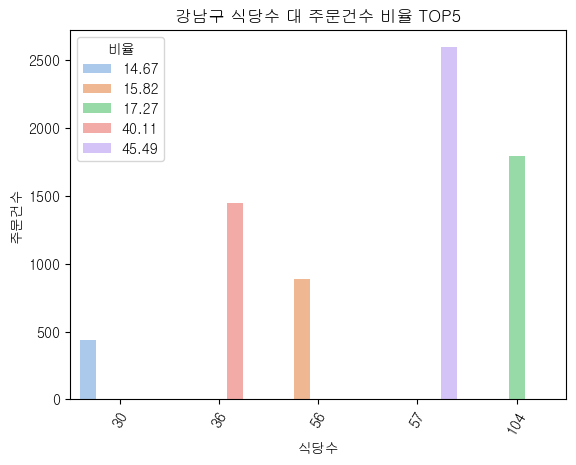

In [352]:
plt.xticks(rotation=60)
sns.barplot(x='식당수',y='주문건수',hue='비율',data=place_order_gn.head(5)).set(title='강남구 식당수 대 주문건수 비율 TOP5')

## 송파구

In [284]:
# 자치구 선정
user_gu = '송파구'

In [285]:
order_cnt_sp = df_order[df_order['gu']==user_gu].drop(['gu'], axis=1).groupby('food').sum() # 업종별 주문건수
place_cnt_sp = df_gu[df_gu['gu']==user_gu].drop(['gu'], axis=1).groupby('food').count()     # 업종별 식당수

In [286]:
# 인덱스 새로 생성
order_cnt_sp.reset_index(inplace=True)
place_cnt_sp.reset_index(inplace=True)

In [287]:
# 데이터 프레임 합치기
place_order_sp = pd.merge(place_cnt_sp, order_cnt_sp, on='food', how='left')

In [288]:
# 데이터 확인
place_order_sp

,food,dummy,order_cnt
0,도시락,17,10.0
1,돈까스/일식,127,1.0
2,분식,76,2.0
3,아시안/양식,129,NaN
4,야식,45,NaN
5,족발/보쌈,32,NaN
6,중식,56,NaN
7,찜탕,52,NaN
8,치킨,97,14.0
9,카페/디저트,63,1135.0


In [289]:
# 비율 구하기
for i in place_order_sp.index:
    place_order_sp.loc[i, 'ratio'] = round(place_order_sp.loc[i, 'order_cnt'] / place_order_sp.loc[i, 'dummy'], 2)

In [290]:
# 비율 높은 순으로 정렬
place_order_sp = place_order_sp.sort_values(by=['ratio'], ascending=False).set_index([pd.Index(range(1, 15))]).head(5)

In [291]:
# 데이터 확인
place_order_sp

,food,dummy,order_cnt,ratio
1,카페/디저트,63,1135.0,18.02
2,도시락,17,10.0,0.59
3,치킨,97,14.0,0.14
4,피자,31,2.0,0.06
5,분식,76,2.0,0.03


In [292]:
# 컬럼명 변경
place_order_sp.rename(columns={'food':'업종', 'dummy':'식당수', 'order_cnt':'주문건수', 'ratio':'비율'}, inplace=True)

In [298]:
# 이미지로 내보내기
dfi.export(place_order_sp, "./plot/송파구 식당수 대 주문건수 비율 TOP 5 테이블.png")

[Text(0.5, 1.0, '송파구 식당수 대 주문건수 비율 TOP5')]

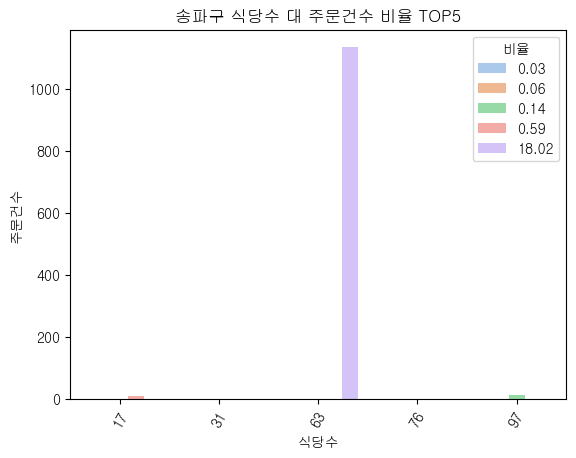

In [351]:
plt.xticks(rotation=60)
sns.barplot(x='식당수',y='주문건수',hue='비율',data=place_order_sp.head(5)).set(title='송파구 식당수 대 주문건수 비율 TOP5')

## 서초구

In [294]:
# 자치구 선정
user_gu = '서초구'

In [295]:
order_cnt_sc = df_order[df_order['gu']==user_gu].drop(['gu'], axis=1).groupby('food').sum() # 업종별 주문건수
place_cnt_sc = df_gu[df_gu['gu']==user_gu].drop(['gu'], axis=1).groupby('food').count()     # 업종별 식당수

In [296]:
# 인덱스 새로 생성
order_cnt_sc.reset_index(inplace=True)
place_cnt_sc.reset_index(inplace=True)

In [297]:
# 데이터 프레임 합치기
place_order_sc = pd.merge(place_cnt_sc, order_cnt_sc, on='food', how='left')

In [298]:
# 데이터 확인
place_order_sc

,food,dummy,order_cnt
0,도시락,11,4110
1,돈까스/일식,93,750
2,분식,33,5366
3,아시안/양식,119,400
4,야식,20,77
5,족발/보쌈,22,2205
6,중식,46,1547
7,찜탕,15,2040
8,치킨,28,13494
9,카페/디저트,57,660


In [299]:
# 비율 구하기
for i in place_order_sc.index:
    place_order_sc.loc[i, 'ratio'] = round(place_order_sc.loc[i, 'order_cnt'] / place_order_sc.loc[i, 'dummy'], 2)

In [300]:
# 비율 높은 순으로 정렬
place_order_sc = place_order_sc.sort_values(by=['ratio'], ascending=False).set_index([pd.Index(range(1, 15))]).head(5)

In [301]:
# 데이터 확인
place_order_sc

,food,dummy,order_cnt,ratio
1,패스트푸드,28,17873,638.32
2,치킨,28,13494,481.93
3,도시락,11,4110,373.64
4,분식,33,5366,162.61
5,찜탕,15,2040,136.00


In [302]:
# 컬럼명 변경
place_order_sc.rename(columns={'food':'업종', 'dummy':'식당수', 'order_cnt':'주문건수', 'ratio':'비율'}, inplace=True)

In [308]:
# 이미지로 내보내기
dfi.export(place_order_sc, "./plot/서초구 식당수 대 주문건수 비율 TOP 5 테이블.png")

[Text(0.5, 1.0, '서초구 식당수 대 주문건수 비율 TOP5')]

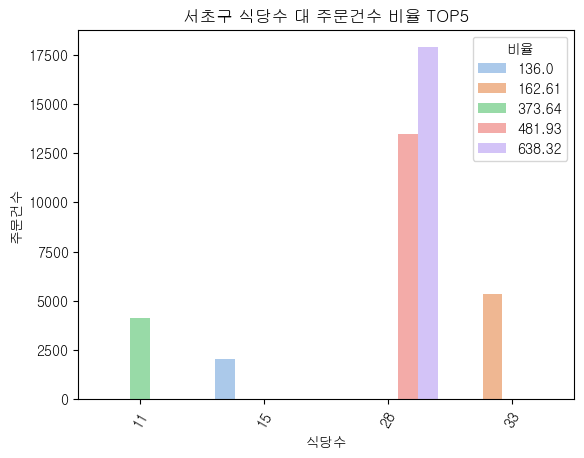

In [350]:
plt.xticks(rotation=60)
sns.barplot(x='식당수',y='주문건수',hue='비율',data=place_order_sc.head(5)).set(title='서초구 식당수 대 주문건수 비율 TOP5')

## 성동구

In [304]:
# 자치구 선정
user_gu = '성동구'

In [305]:
order_cnt_sd = df_order[df_order['gu']==user_gu].drop(['gu'], axis=1).groupby('food').sum() # 업종별 주문건수
place_cnt_sd = df_gu[df_gu['gu']==user_gu].drop(['gu'], axis=1).groupby('food').count()     # 업종별 식당수

In [306]:
# 인덱스 새로 생성
order_cnt_sd.reset_index(inplace=True)
place_cnt_sd.reset_index(inplace=True)

In [307]:
# 데이터 프레임 합치기
place_order_sd = pd.merge(place_cnt_sd, order_cnt_sd, on='food', how='left')

In [308]:
# 데이터 확인
place_order_sd

,food,dummy,order_cnt
0,도시락,11,NaN
1,돈까스/일식,60,1.0
2,분식,22,NaN
3,아시안/양식,99,1.0
4,야식,24,31.0
5,족발/보쌈,28,3.0
6,중식,18,NaN
7,찜탕,20,NaN
8,치킨,19,NaN
9,카페/디저트,50,NaN


In [309]:
# 비율 구하기
for i in place_order_sd.index:
    place_order_sd.loc[i, 'ratio'] = round(place_order_sd.loc[i, 'order_cnt'] / place_order_sd.loc[i, 'dummy'], 2)

In [310]:
# 비율 높은 순으로 정렬
place_order_sd = place_order_sd.sort_values(by=['ratio'], ascending=False).set_index([pd.Index(range(1, 15))]).head(5)

In [311]:
# 데이터 확인
place_order_sd

,food,dummy,order_cnt,ratio
1,야식,24,31.0,1.29
2,회,5,1.0,0.20
3,족발/보쌈,28,3.0,0.11
4,피자,20,1.0,0.05
5,돈까스/일식,60,1.0,0.02


In [312]:
# 컬럼명 변경
place_order_sd.rename(columns={'food':'업종', 'dummy':'식당수', 'order_cnt':'주문건수', 'ratio':'비율'}, inplace=True)

In [318]:
# 이미지로 내보내기
dfi.export(place_order_sd, "./plot/성동구 식당수 대 주문건수 비율 TOP 5 테이블.png")

[Text(0.5, 1.0, '성동구 식당수 대 주문건수 비율 TOP5')]

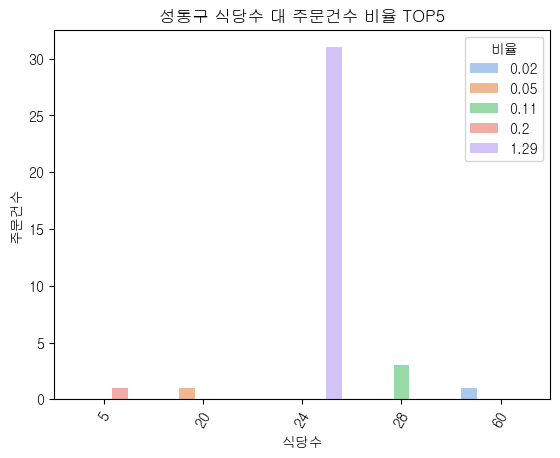

In [349]:
plt.xticks(rotation=60)
sns.barplot(x='식당수',y='주문건수',hue='비율',data=place_order_sd).set(title='성동구 식당수 대 주문건수 비율 TOP5')

## 용산구

In [314]:
# 자치구 선정
user_gu = '용산구'

In [315]:
order_cnt_ys = df_order[df_order['gu']==user_gu].drop(['gu'], axis=1).groupby('food').sum() # 업종별 주문건수
place_cnt_ys = df_gu[df_gu['gu']==user_gu].drop(['gu'], axis=1).groupby('food').count()     # 업종별 식당수

In [316]:
# 인덱스 새로 생성
order_cnt_ys.reset_index(inplace=True)
place_cnt_ys.reset_index(inplace=True)

In [317]:
# 데이터 프레임 합치기
place_order_ys = pd.merge(place_cnt_ys, order_cnt_ys, on='food', how='left')

In [318]:
# 데이터 확인
place_order_ys

,food,dummy,order_cnt
0,도시락,5,NaN
1,돈까스/일식,67,222.0
2,분식,17,741.0
3,아시안/양식,237,61.0
4,야식,22,45.0
5,족발/보쌈,20,446.0
6,중식,29,1.0
7,찜탕,16,NaN
8,치킨,21,281.0
9,카페/디저트,76,8.0


In [319]:
# 비율 구하기
for i in place_order_ys.index:
    place_order_ys.loc[i, 'ratio'] = round(place_order_ys.loc[i, 'order_cnt'] / place_order_ys.loc[i, 'dummy'], 2)

In [320]:
# 비율 높은 순으로 정렬
place_order_ys = place_order_ys.sort_values(by=['ratio'], ascending=False).set_index([pd.Index(range(1, 15))]).head(5)

In [321]:
# 데이터 확인
place_order_ys

,food,dummy,order_cnt,ratio
1,피자,22,2574.0,117.00
2,분식,17,741.0,43.59
3,족발/보쌈,20,446.0,22.30
4,패스트푸드,27,455.0,16.85
5,치킨,21,281.0,13.38


In [322]:
# 컬럼명 변경
place_order_ys.rename(columns={'food':'업종', 'dummy':'식당수', 'order_cnt':'주문건수', 'ratio':'비율'}, inplace=True)

In [328]:
# 이미지로 내보내기
dfi.export(place_order_ys, "./plot/용산구 식당수 대 주문건수 비율 TOP 5 테이블.png")

[Text(0.5, 1.0, '용산구 식당수 대 주문건수 비율 TOP5')]

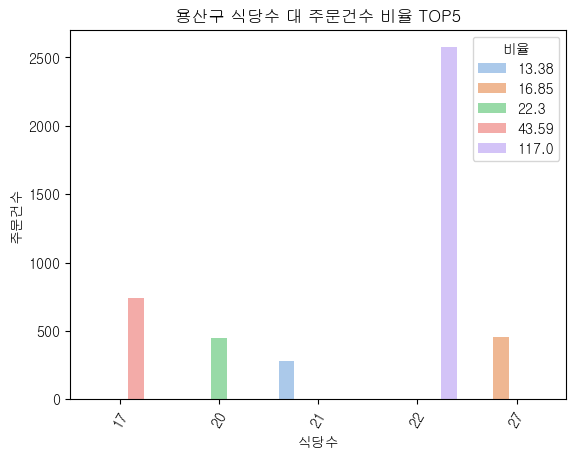

In [348]:
plt.xticks(rotation=60)
sns.barplot(x='식당수',y='주문건수',hue='비율',data=place_order_ys).set(title='용산구 식당수 대 주문건수 비율 TOP5')

## 광진구

In [324]:
# 자치구 선정
user_gu = '광진구'

In [325]:
order_cnt_gj = df_order[df_order['gu']==user_gu].drop(['gu'], axis=1).groupby('food').sum() # 업종별 주문건수
place_cnt_gj = df_gu[df_gu['gu']==user_gu].drop(['gu'], axis=1).groupby('food').count()     # 업종별 식당수

In [326]:
# 인덱스 새로 생성
order_cnt_gj.reset_index(inplace=True)
place_cnt_gj.reset_index(inplace=True)

In [327]:
# 데이터 프레임 합치기
place_order_gj = pd.merge(place_cnt_gj, order_cnt_gj, on='food', how='left')

In [328]:
# 데이터 확인
place_order_gj

,food,dummy,order_cnt
0,도시락,11,NaN
1,돈까스/일식,64,NaN
2,분식,59,1.0
3,아시안/양식,94,NaN
4,야식,21,NaN
5,족발/보쌈,31,NaN
6,중식,42,NaN
7,찜탕,35,NaN
8,치킨,42,3.0
9,카페/디저트,32,NaN


In [329]:
# 비율 구하기
for i in place_order_gj.index:
    place_order_gj.loc[i, 'ratio'] = round(place_order_gj.loc[i, 'order_cnt'] / place_order_gj.loc[i, 'dummy'], 2)

In [330]:
# 비율 높은 순으로 정렬
place_order_gj = place_order_gj.sort_values(by=['ratio'], ascending=False).set_index([pd.Index(range(1, 15))]).head(5)

In [331]:
# 데이터 확인
place_order_gj

,food,dummy,order_cnt,ratio
1,치킨,42,3.0,0.07
2,회,16,1.0,0.06
3,분식,59,1.0,0.02
4,한식,185,2.0,0.01
5,도시락,11,NaN,NaN


In [332]:
# 컬럼명 변경
place_order_gj.rename(columns={'food':'업종', 'dummy':'식당수', 'order_cnt':'주문건수', 'ratio':'비율'}, inplace=True)

In [338]:
# 이미지로 내보내기
dfi.export(place_order_gj, "./plot/광진구 식당수 대 주문건수 비율 TOP 5 테이블.png")

[Text(0.5, 1.0, '광진구 식당수 대 주문건수 비율 TOP5')]

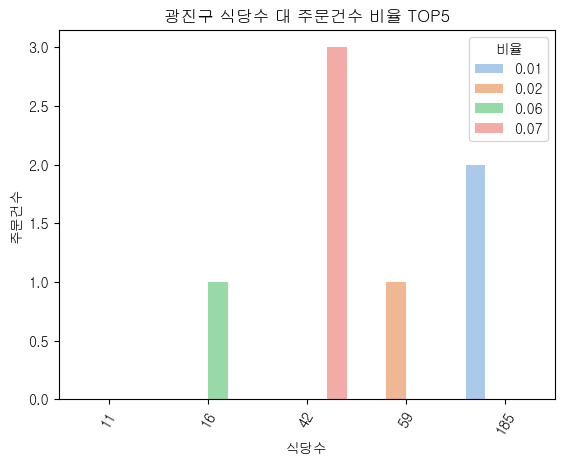

In [347]:
plt.xticks(rotation=60)
sns.barplot(x='식당수',y='주문건수',hue='비율',data=place_order_gj).set(title='광진구 식당수 대 주문건수 비율 TOP5')

## 총

In [335]:
# 각 데이터 프레임에 자치구 컬럼 추가
place_order_gn['자치구'] = '강남구'
place_order_sp['자치구'] = '송파구'
place_order_sc['자치구'] = '서초구'
place_order_sd['자치구'] = '성동구'
place_order_ys['자치구'] = '용산구'
place_order_gj['자치구'] = '광진구'

In [336]:
# 데이터 프레임 합치기
place_order_all = pd.concat([place_order_gn, place_order_sp, place_order_sc, place_order_sd, place_order_ys, place_order_gj])

In [337]:
place_order_all = place_order_all.sort_values(by=['비율'], ascending=False)
place_order_all.set_index([pd.Index(range(1, place_order_all.자치구.count()+1))], inplace=True)

In [338]:
# 데이터 확인
place_order_all

,업종,식당수,주문건수,비율,자치구
1,패스트푸드,28,17873.0,638.32,서초구
2,치킨,28,13494.0,481.93,서초구
3,도시락,11,4110.0,373.64,서초구
4,분식,33,5366.0,162.61,서초구
5,찜탕,15,2040.0,136.00,서초구
6,피자,22,2574.0,117.00,용산구
7,치킨,57,2593.0,45.49,강남구
8,분식,17,741.0,43.59,용산구
9,회,36,1444.0,40.11,강남구
10,족발/보쌈,20,446.0,22.30,용산구


In [343]:
# 데이터 프레임을 이미지로 변환
place_order_all = place_order_all.head(5)
dfi.export(place_order_all, "./plot/강남인근 구 식당수 대 주문건수 비율 TOP 5 테이블.png")

[Text(0.5, 1.0, '강남인근 구 식당수 대 주문건수 비율 TOP 5')]

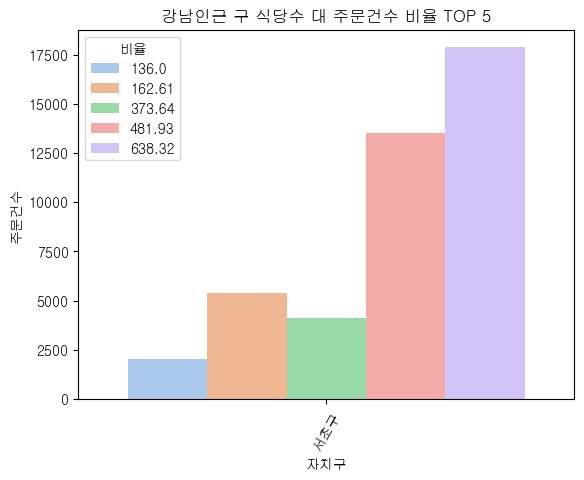

In [346]:
plt.xticks(rotation=60)
sns.barplot(x='자치구',y='주문건수',hue='비율',data=place_order_all.head(5)).set(title='강남인근 구 식당수 대 주문건수 비율 TOP 5')